# Exploring Gradient Descent

1. Revisit computing a OLS regression using the True Matrix Form (10 Minutes)
2. Explore the theory behind gradient descent (15 Minutes)
3. Build a basic gradient descent model (25 Minutes)
4. Explore the results (5 Minutes)
5. Optimize the model (5 Minutes)

### Key Assumptions of Linear Regression

- Linear relationship
- Multivariate normality
- No or little multicollinearity
- No auto-correlation
- Homoscedasticity

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline
from IPython.core.display import display, HTML
from IPython.display import Image, IFrame
from IPython.lib.display import YouTubeVideo

plt.style.use(['ggplot'])

## Step 1: First let's compute OLS in Matrix Form using the True Analytics Approach

### Create Data
<h5> Generate some data with:
\begin{equation} \theta_0= 4 \end{equation} 
\begin{equation} \theta_1= 3 \end{equation} 
​
Add some Gaussian noise to the data

In [10]:
#Uncomment this box to reveal some theory on computing OLS using The True Model
#IFrame("https://web.stanford.edu/~mrosenfe/soc_meth_proj3/matrix_OLS_NYU_notes.pdf", width=1000, height=1000)

In [43]:
X = 2 * np.random.rand(100,1) #Creating a column vector of uniformly distributed points 100 points 1 column prepresenting our input data
y = 3 + 4 * X + np.random.randn(100,1) #Creating a column vector sample from a standard normal distribution

Text(0,0.5,'$y$')

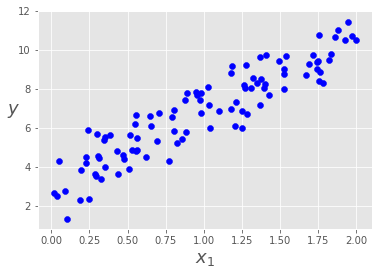

In [44]:
plt.scatter(X, y, c='b')
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)

In [46]:
X_mat = np.c_[np.ones((100,1)),X] #creating a 2D matrix

In [47]:
##a non-sklearn method of doing OLS 'by-hand'
beta_hat = np.linalg.inv(X_mat.T.dot(X_mat)).dot(X_mat.T).dot(y) #We're essentially solving for beta_hat here in eq (12)
print(beta_hat)

[[ 3.08401783]
 [ 3.78206673]]


In [48]:
X_new = np.array([[0],[2]])
X_new_b = np.c_[np.ones((2,1)),X_new]
y_predict = X_new_b.dot(beta_hat)
y_predict

array([[  3.08401783],
       [ 10.64815129]])

[0, 2, 0, 15]

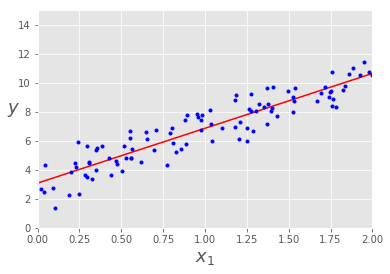

In [49]:
plt.plot(X_new,y_predict,'r-')
plt.plot(X,y,'b.')
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0,2,0,15])

## Step 2: Load in New Dataset for Exploring Gradient Descent


Here we plan on performing a linear regression with one variable to predict profits for a food truck. The data contains 2 columns, population of a city (in 10,000s) and the profits of the food truck (in 10,000s). 

In [6]:
data = pd.read_csv('example_data.txt', names = ['population', 'profit'])

In [7]:
data.head()

,population,profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [8]:
## Split population and profit into X and y
X_df = pd.DataFrame(data.population)
y_df = pd.DataFrame(data.profit)

## Length, or number of observations, in our data
m = len(y_df)

Text(0,0.5,'Profit in $10k')

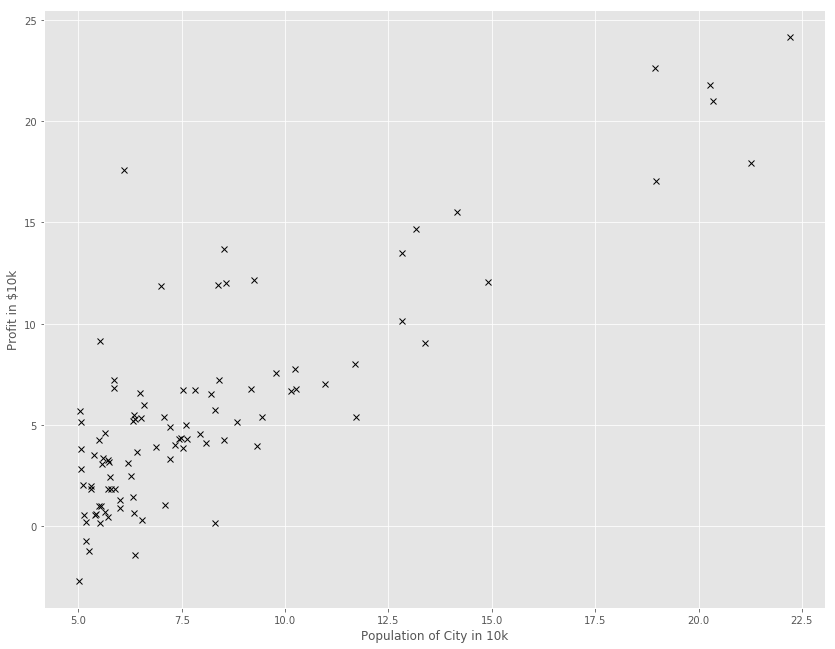

In [16]:
plt.figure(figsize=(14,11))
plt.plot(X_df, y_df, 'kx')
plt.xlabel('Population of City in 10k')
plt.ylabel('Profit in $10k')

## Step 3: Gradient Descent Theory

The idea of linear regression is to find a relationship between our target or dependent variable (y) and a set of explanatory variables ($x_1, x_2...$). This relatonship can then be used to predict other values.

In our case with one variable, this relationship is a line defined by parameters $\beta$ and the following form: $y = \beta_0 + \beta_1x$, where $\beta_0$ is our intercept.

This can be extended to multivariable regression by extending the equation in vector form: $y=X\beta$

Text(0,0.5,'Profit in $10,000s')

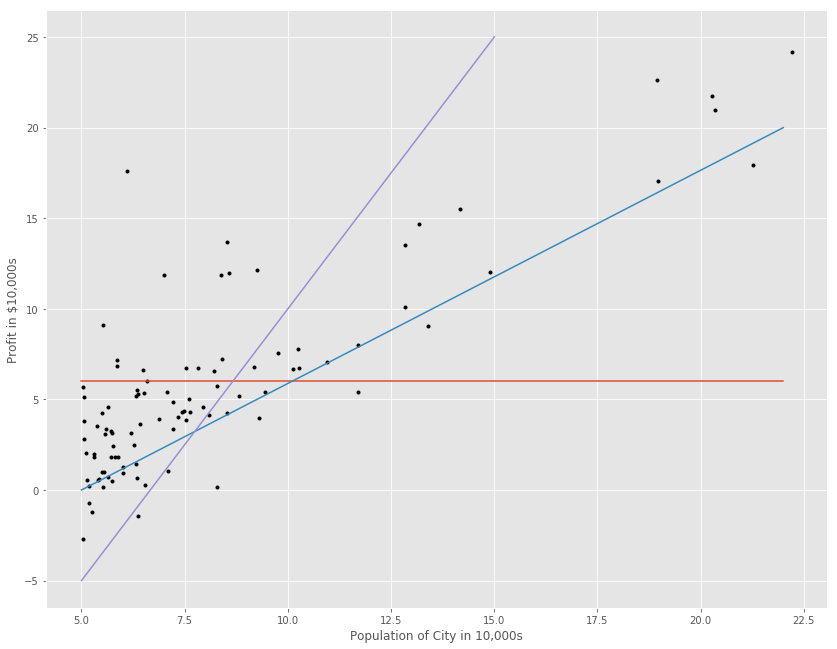

In [53]:
plt.figure(figsize=(14,11))
plt.plot(X_df, y_df, 'k.')
plt.plot([5, 22], [6,6], '-')
plt.plot([5, 22], [0,20], '-')
plt.plot([5, 15], [-5,25], '-')
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s')

## Cost Function
In order to generate the best fitting line that represent our linearly correlated data, we want to pick values for $\beta$ that allows our predicted value to be as close to the actual value as possible. In other words, we want the distance or residual between our hypothesis $h(x)$ and y to be minimized.

We formally define a cost function using ordinary least squares that sums the square of the residuals. To find the linear regression line, we minimize basically want to minimise the following equation known as the standard cost equation:
$$J(\beta) = \frac{1}{2m}\sum_{i=1}^m(h_\beta(x^{(i)})-y^{(i)})^2$$

Remember our hypothesis is that we're trying to find values for the coefficient given by this linear model:
$$h_\beta(x) = \beta^{T}x = \beta_0 + \beta_1x_1$$

The parameters of the model are the beta values. We adjust $\beta_j$ to minimze the cost function $J(\beta)$. 

And we can use batch gradient descent where each iteration performs the update
$$\beta_j := \beta_j - \alpha\frac{1}{m}\sum_{i=1}^m (h_\beta(x^{(i)})-y^{(i)})x_{j}^{(i)}$$


**Please note that in subsequent sections we revert to using $\theta$ instead of $\beta$**

Text(0.5,1,'Quadratic Equation')

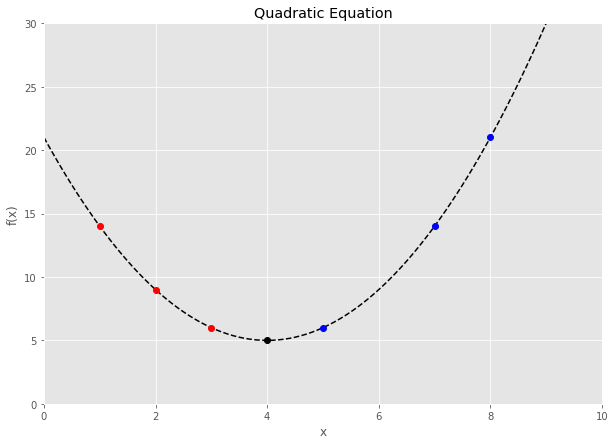

In [54]:
x_quad = [n/10 for n in range(0, 100)]
y_quad = [(n-4)**2+5 for n in x_quad]
plt.figure(figsize = (10,7))
plt.plot(x_quad, y_quad, 'k--')
plt.axis([0,10,0,30])
plt.plot([1, 2, 3], [14, 9, 6], 'ro')
plt.plot([5, 7, 8],[6, 14, 21], 'bo')
plt.plot(4, 5, 'ko')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Quadratic Equation')

We're trying to find the local minimum on this function. If we start at the first red dot at x = 2, we find the gradient and we move against it. In this case, the gradient is the slope. And since the slope is negative, our next attempt is further to the right. Thus bringing us closer to the minimum. 

Indeed, we keep updating our parameter beta to get us closer and closer to the minumum.
$$\beta_j := \beta_j - \alpha\frac{\partial}{\partial \beta_j} J(\beta)$$
Where $\alpha$ is our learning rate and $J(\beta)$ is our cost function. By adjusting alpha, we can change how quickly we converge on the minimum (at the risk of overshooting and diverging, instead of converging on our local minimum)

## Step 4: Buidling a Gradient Descent Model

1. Transform you data into formats acceptable for carrying out some linear algebra
2. Initialize a couple key parameters and initial conditions
3. Define your cost function
4. Define your gradient descent algorithm
5. Run you algorithm and tweak parameters if necessary
6. Plot your results and return to step 5 if necessary

In [55]:
# Let's append our feature data with an additional column which will represent a y intercept
X_df['intercept'] = 1
# X_df.head()

In [56]:
X = np.array(X_df) # converting our 2d matrix containing the feature 'population 10k' and intercept into an array
y = np.array(y_df).flatten() #Return a copy of the array collapsed into one dimension.

In [57]:
theta = np.array([0,0]) #initialize theta as an array containing zeroes

### Defining our Cost function:

$$J(\theta) = \frac{1}{2m}\sum_{i=1}^m((X\cdot\theta)-y)^2$$

Where m = number of datapoints in your dataset

If you're wondering why we are setting theta = np.array([0, 0])... This is helping us initialize a starting point for iterating through our minimization algorithm

In [58]:
def cost_function(X, y, theta):
    
    #this is equivalent to setting the number of training examples (ie: we only have 97)
    m = len(X)
    
    #Here we are actually defining the function above. Please note we are dot multiplying matrices.
    J = (1/2)*m * (np.sum((np.dot(X,theta)) - y)**2)
    
    return J

In [59]:
cost_function(X, y, theta)

15559020.291617688

### Defining our Gradient Descent function:

Now, I split the gradient descent algorithm into 4 parts so that I can see what's going on. Plus, I like to check my matrix dimensions to make sure that I'm doing the math in the right order.

Also please remember that we take the partial derivative with respect to theta to get a general equation describing our gradient.

1. calculate hypothesis[97x1] = x[97x2] * theta[2x1]
2. calculte loss [97x1] with element-wise subtraction
3. calculate gradient [2x1] = X' [2x97] loss [971]
4. update parameter theta [2x1] after element-wise subtraction multiplied by a scalar

In [60]:
def gradient_descent(X, y, theta, alpha, iterations):
    
    prior_cost = [0] * iterations
    
    for i in range(iterations):
        hypothesis = X.dot(theta)
        loss = hypothesis - y
        gradient = X.T.dot(loss)/m
        theta = theta - alpha*gradient
        cost = cost_function(X, y, theta)
        prior_cost[i] = cost
        
    return theta, prior_cost

In [61]:
theta = np.array([0,0])
alpha = 0.01
iterations = 150

In [62]:
theta, prior_cost = gradient_descent(X, y, theta, alpha, iterations)

In [63]:
print(theta)

[ 0.88834569 -0.86287834]


## Step 5: Explore our results

At this point we have learned a whole lot about using cost functions and building a algorithm that allows us to iteratively minimize the cost function and making small iterative changes to the $$\theta_0$$ and $$\theta_1$$

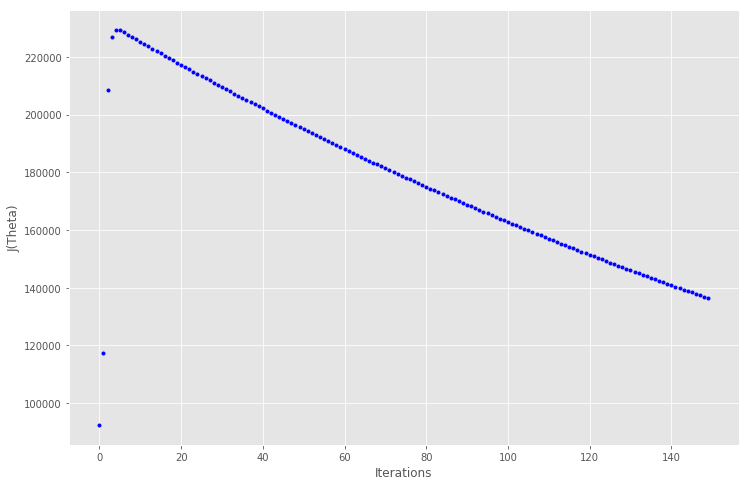

In [64]:
fig,ax = plt.subplots(figsize=(12,8))

ax.set_ylabel('J(Theta)')
ax.set_xlabel('Iterations')
ax.plot(range(iterations),prior_cost,'b.')

**But have we really determine whether we have reached our local minima and is our approximation any good? The simple answer is no. We need to really dig into the results plotted against varying values for the parameter 'iterations'**

In [65]:
def plot_GD(iterations,alpha,ax,ax1=None):
     """
     n_iter = no of iterations
     lr = Learning Rate
     ax = Axis to plot the Gradient Descent
     ax1 = Axis to plot cost_history vs Iterations plot

     """
     _ = ax.plot(X_df['population'],y,'b.')
     theta = np.array([0,0])

     tr = 0.25
     prior_cost = [0] * iterations
     for i in range(iterations):
        pred_prev = X.dot(theta)
        theta,h = gradient_descent(X, y, theta, alpha, 1)
        pred = X.dot(theta)

        prior_cost[i] = h[0]

        if ((i % 25 == 0) ):
            _ = ax.plot(X_df['population'],pred,'r-',alpha=tr)
            if tr < 0.8:
                tr = tr+0.2
     if not ax1== None:
        _ = ax1.plot(range(iterations),prior_cost,'b.')  

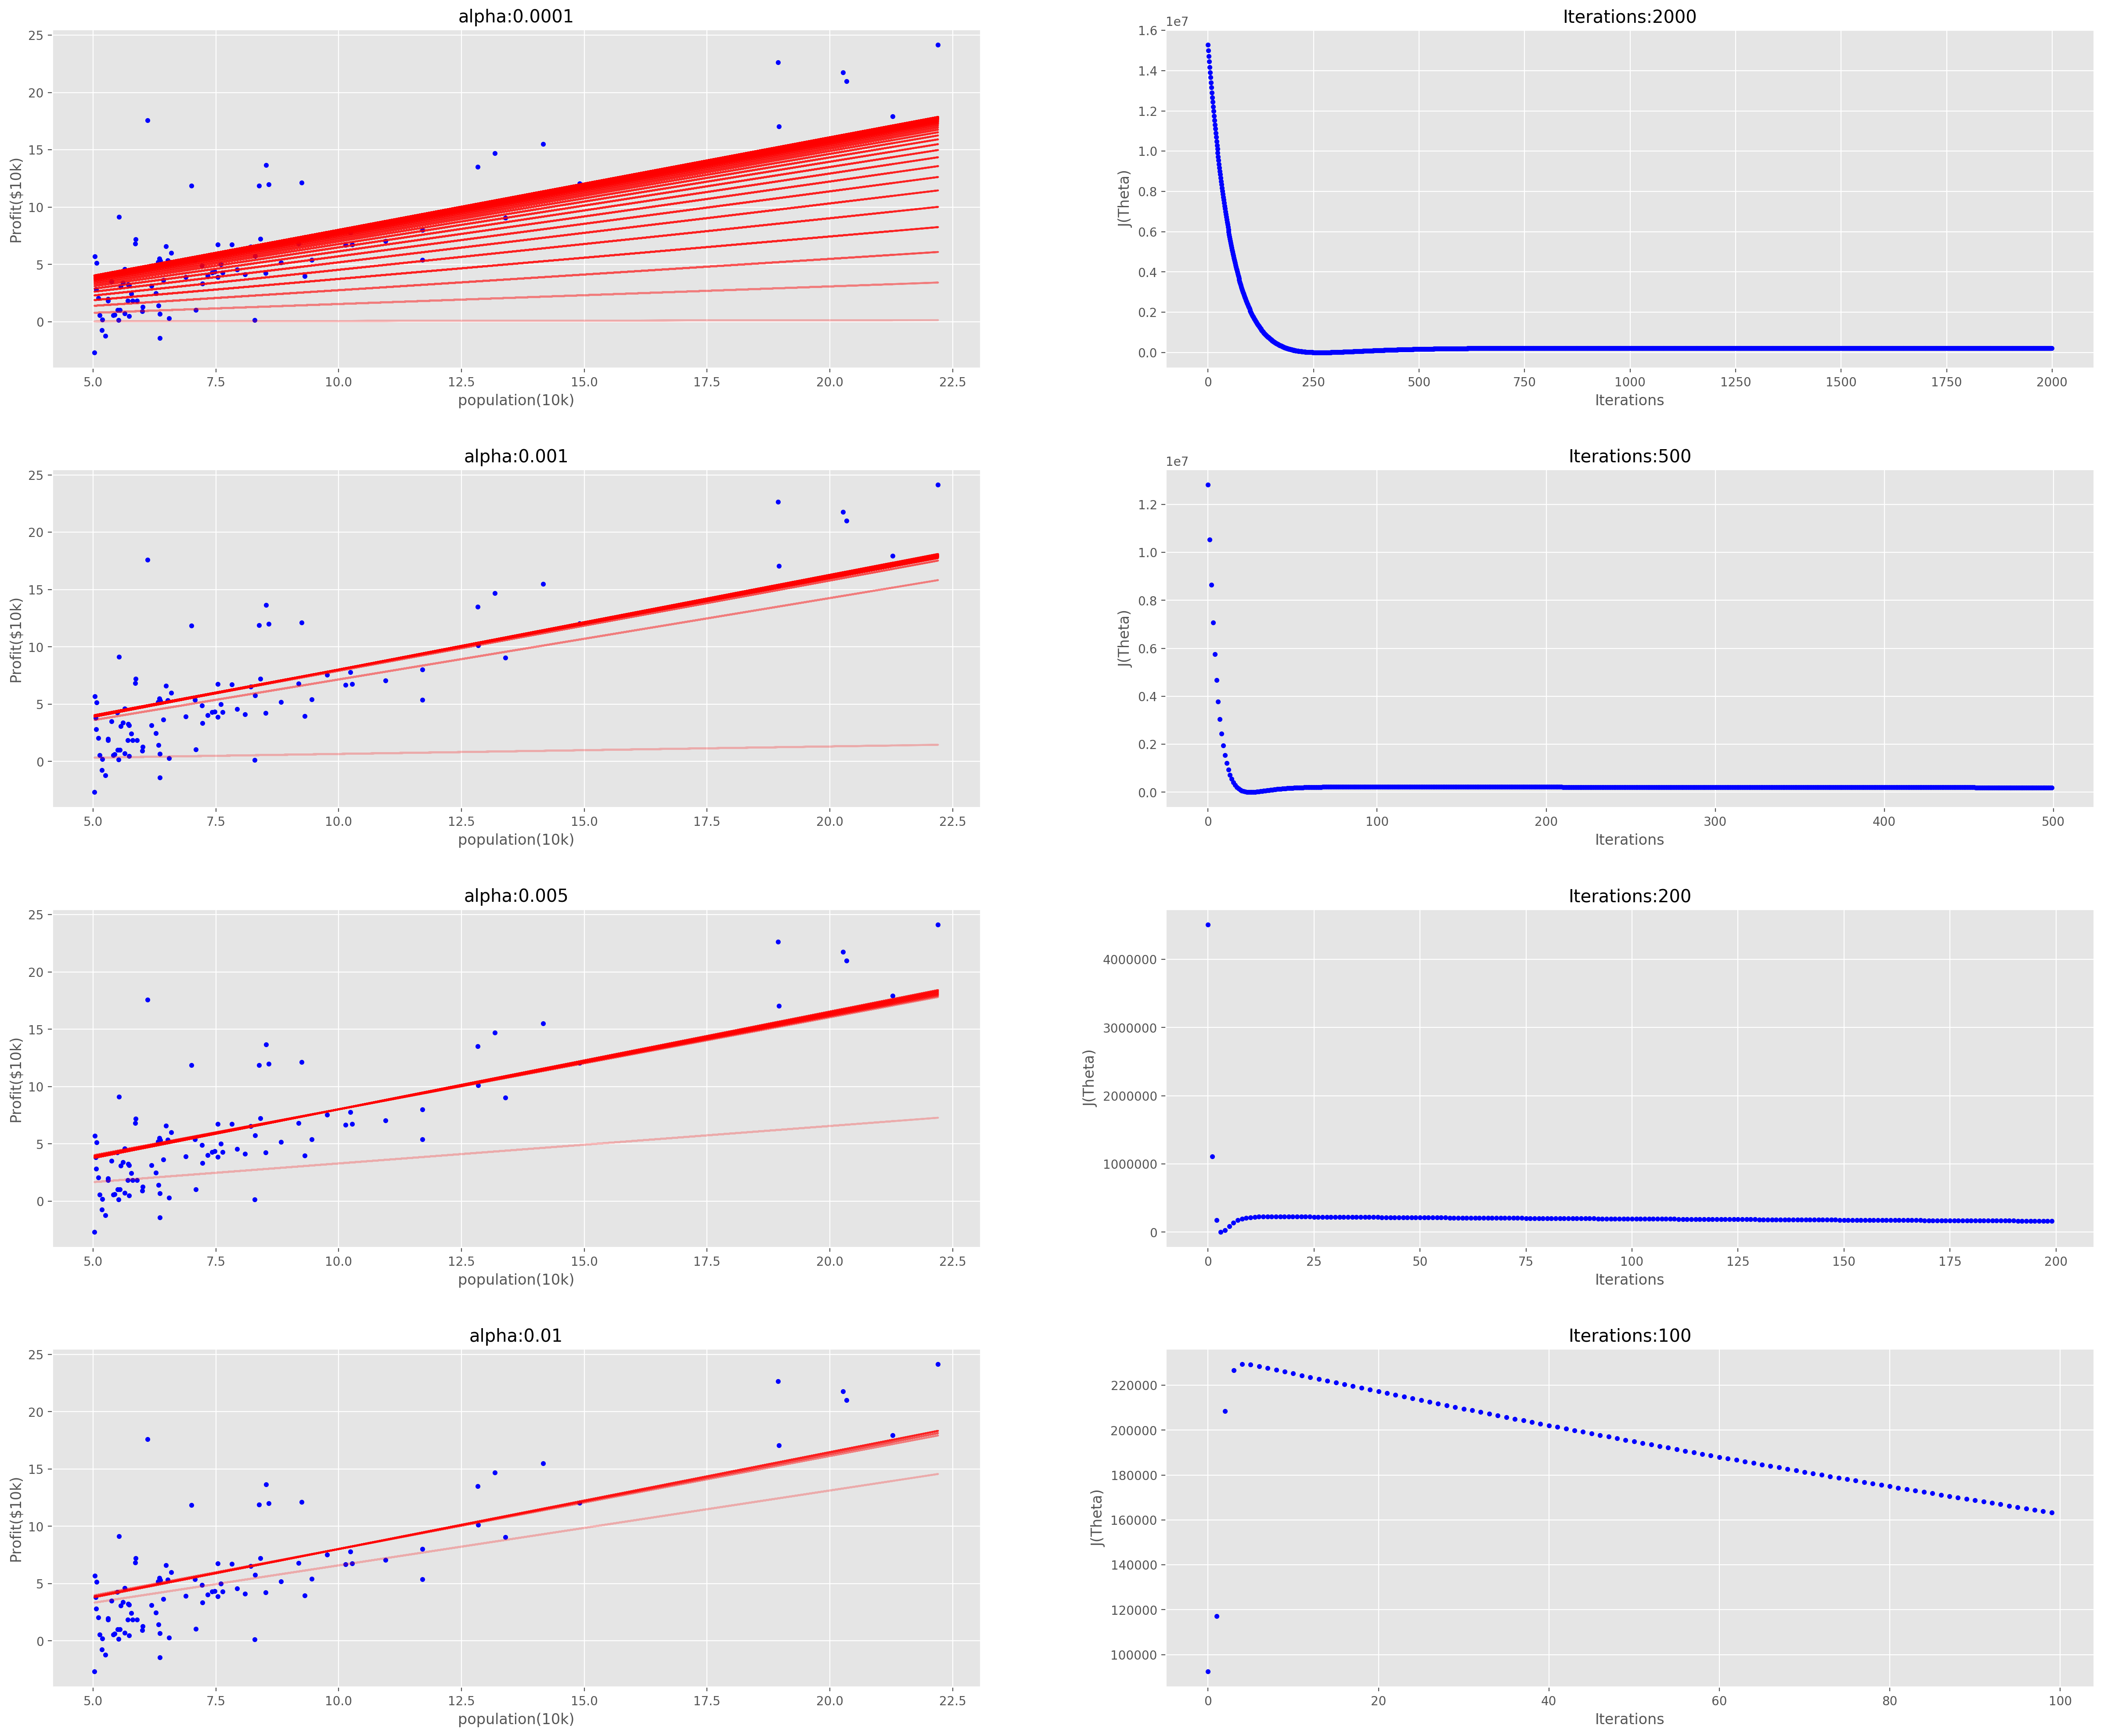

In [66]:
fig = plt.figure(figsize=(30,25),dpi=200)
fig.subplots_adjust(hspace=0.3, wspace=0.2)

it_lr =[(2000,0.0001),(500,0.001),(200,0.005),(100,0.01)]
count =0
for iterations, alpha in it_lr:
    count += 1
    
    ax = fig.add_subplot(4, 2, count)
    count += 1
   
    ax1 = fig.add_subplot(4,2,count)
    
    ax.set_title("alpha:{}".format(alpha))
    ax1.set_title("Iterations:{}".format(iterations))
    ax.set_xlabel('population(10k)')
    ax.set_ylabel('Profit($10k)')
    ax1.set_xlabel('Iterations')
    ax1.set_ylabel('J(Theta)')
    plot_GD(iterations,alpha,ax,ax1)

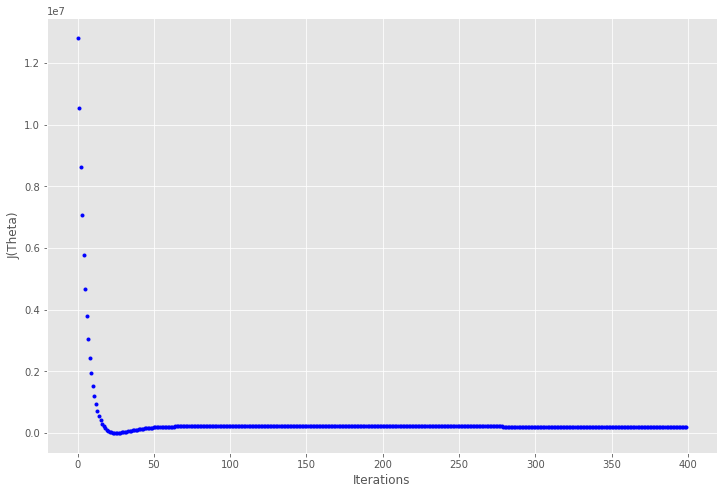

In [67]:
theta = np.array([0,0])
alpha = 0.001
iterations = 400
theta, prior_cost = gradient_descent(X, y, theta, alpha, iterations)

fig,ax = plt.subplots(figsize=(12,8))
ax.set_ylabel('J(Theta)')
ax.set_xlabel('Iterations')
ax.plot(range(iterations),prior_cost,'b.')

In [68]:
theta = np.array([0,0])
alpha = 0.001
iterations = 50
theta, prior_cost = gradient_descent(X, y, theta, alpha, iterations)

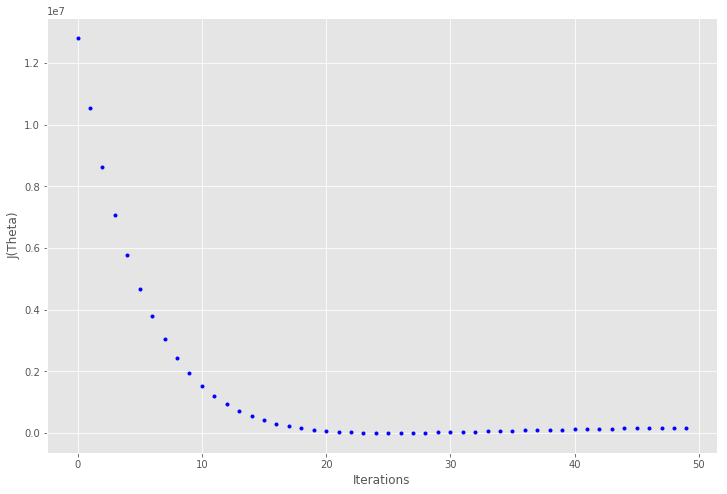

In [69]:
fig,ax = plt.subplots(figsize=(12,8))
ax.set_ylabel('J(Theta)')
ax.set_xlabel('Iterations')
ax.plot(range(iterations),prior_cost,'b.')

In [70]:
theta = np.array([0,0])
alpha = 0.005
iterations = 10
theta, prior_cost = gradient_descent(X, y, theta, alpha, iterations)

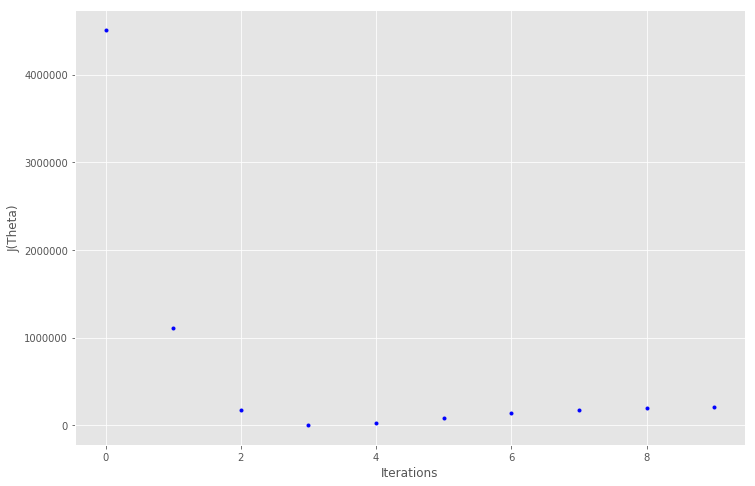

In [71]:
fig,ax = plt.subplots(figsize=(12,8))
ax.set_ylabel('J(Theta)')
ax.set_xlabel('Iterations')
ax.plot(range(iterations),prior_cost,'b.')

In [72]:
theta = np.array([0,0])
alpha = 0.005
iterations = 4
theta, prior_cost = gradient_descent(X, y, theta, alpha, iterations)
print(theta)

[ 0.69964593  0.05582945]


## Conclusion

1. We've covered the underlying mathematical principle used to guide is in understanding how gradient descent works.
2. We've built a simple gradient descent model.
3. We've walked through a simple approach to investigating the results of a model.
4. We've very simply chosen the right hyperparameters by exploring our results.


### Key Take Aways:

- **It's important to inspect the mechanics of all your algorithms. Nothing is truly a black box, that's an excuse reserved for folks who are too lazy to dig into the math or too embarresed to say they really just don't understand how it works.**

- **This generalized approach can be used with most other cost functions. Please keep in mind that calculating the gradient requires taking the partial derivative of the cost function with respect to the parameters you are trying to optimize. When applying gradient descent using other cost functions please do recalculate the gradient of the new cost function (otherwise an experienced data scientist will just shake their head and walk away. This is especially detrimental when the other data scientist is your client)**

- **Remember the five assumptions for using linear regression. Do you remember what they are?**